In [6]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tarfile
import math
from scipy import stats
import statsmodels.formula.api as smf

In [30]:
# IMDB datasets
names_imdb = pd.read_csv('/Volumes/External SSD/ADA Project/ada-2022-project-earthnet/data/imdb/name.basics.tsv', sep='\t')
titles_imdb = pd.read_csv('/Volumes/External SSD/ADA Project/ada-2022-project-earthnet/data/imdb/title.basics.tsv', sep='\t')
ratings_imdb = pd.read_csv('/Volumes/External SSD/ADA Project/ada-2022-project-earthnet/data/imdb/title.ratings.tsv', sep='\t')

/var/folders/g4/ttsfd72s5qn1w8w3x92b3yyw0000gn/T/ipykernel_21416/4290967824.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles_imdb = pd.read_csv('/Volumes/External SSD/ADA Project/ada-2022-project-earthnet/data/imdb/title.basics.tsv', sep='\t')


In [31]:
names_imdb.head(10)

nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   
5  nm0000006   Ingrid Bergman      1915      1982   
6  nm0000007  Humphrey Bogart      1899      1957   
7  nm0000008    Marlon Brando      1924      2004   
8  nm0000009   Richard Burton      1925      1984   
9  nm0000010     James Cagney      1899      1986   

                     primaryProfession  \
0       soundtrack,actor,miscellaneous   
1                   actress,soundtrack   
2  actress,soundtrack,music_department   
3              actor,soundtrack,writer   
4                writer,director,actor   
5          actress,soundtrack,producer   
6            actor,soundtrack,producer   
7            actor,soundtrack,director   
8            actor,soundtrack,producer   
9            actor,soundtrack,director   

                            knownForTitles  
0  tt0031983,tt0053137,tt0072308,tt0050419  
1  tt0037382,tt0117057,tt0071877,tt0038355  
2  tt0054452,tt0057345,tt0049189,tt0056404  
3  tt0078723,tt0072562,tt0077975,tt0080455  
4  tt0083922,tt0060827,tt0050986,tt0050976  
5  tt0034583,tt0036855,tt0077711,tt0038109  
6  tt0034583,tt0037382,tt0042593,tt0043265  
7  tt0047296,tt0078788,tt0070849,tt0068646  
8  tt0061184,tt0087803,tt0059749,tt0057877  
9  tt0035575,tt0042041,tt0029870,tt0031867

In [32]:
titles_imdb.head(10)

tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

                                 originalTitle isAdult startYear endYear  \
0                                   Carmencita       0      1894      \N   
1                       Le clown et ses chiens       0      1892      \N   
2                               Pauvre Pierrot       0      1892      \N   
3                                  Un bon bock       0      1892      \N   
4                             Blacksmith Scene       0      1893      \N   
5                            Chinese Opium Den       0      1894      \N   
6  Corbett and Courtney Before the Kinetograph       0      1894      \N   
7       Edison Kinetoscopic Record of a Sneeze       0      1894      \N   
8                                   Miss Jerry       0      1894      \N   
9          La sortie de l'usine Lumière à Lyon       0      1895      \N   

  runtimeMinutes                    genres  
0              1         Documentary,Short  
1              5           Animation,Short  
2              4  Animation,Comedy,Romance  
3             12           Animation,Short  
4              1              Comedy,Short  
5              1                     Short  
6              1               Short,Sport  
7              1         Documentary,Short  
8             45                   Romance  
9              1         Documentary,Short

In [33]:
ratings_imdb.head(10)

tconst  averageRating  numVotes
0  tt0000001            5.7      1922
1  tt0000002            5.8       259
2  tt0000003            6.5      1734
3  tt0000004            5.6       174
4  tt0000005            6.2      2545
5  tt0000006            5.1       175
6  tt0000007            5.4       797
7  tt0000008            5.4      2064
8  tt0000009            5.2       200
9  tt0000010            6.9      6965

In [89]:
movie = pd.read_csv('/Volumes/External SSD/ADA Project/ada-2022-project-earthnet/data/MovieSummaries/movie.metadata.tsv', 
                 sep='\t',
                 names=['Wikipedia_movie_ID',
                        'Freebase_movie_ID',
                        'Movie_name',
                        'Movie_release_date',
                        'Movie_box_office_revenue',
                        'Movie_runtime',
                        'Movie_languages',
                        'Movie_countries',
                        'Movie_genres'],
                 header=None)

In [90]:
character = pd.read_csv('/Volumes/External SSD/ADA Project/ada-2022-project-earthnet/data/MovieSummaries/character.metadata.tsv', 
                 sep='\t',
                 names=['Wikipedia_movie_ID',
                        'Freebase_movie_ID',
                        'Movie_release_date',
                        'Character_name',
                        'Actor_date_of_birth',
                        'Actor_gender',
                        'Actor_height',
                        'Actor_ethnicity',
                        'Actor_name',
                        'Actor_age_at_movie_release',
                        'Freebase_character/actor_map_ID',
                        'Freebase_character_ID',
                        'Freebase_actor_ID'],
                 header=None)

In [91]:
plots = pd.read_csv('/Volumes/External SSD/ADA Project/ada-2022-project-earthnet/data/MovieSummaries/plot_summaries.txt', 
                 sep='\t',
                 names=['Wikipedia_movie_ID',
                        'Summary'],
                 header=None)

In [92]:
movie.head(5)

Wikipedia_movie_ID Freebase_movie_ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie_name Movie_release_date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie_box_office_revenue  Movie_runtime  \
0                14010832.0           98.0   
1                       NaN           95.0   
2                       NaN           83.0   
3                       NaN          110.0   
4                       NaN          106.0   

                      Movie_languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/05f_3": "Norwegian Language"}   
3  {"/m/02h40lc": "English Language"}   
4   {"/m/04306rv": "German Language"}   

                             Movie_countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                        Movie_genres  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                            {"/m/07s9rl0": "Drama"}

In [93]:
character.head(5)

Wikipedia_movie_ID Freebase_movie_ID Movie_release_date  \
0              975900         /m/03vyhn         2001-08-24   
1              975900         /m/03vyhn         2001-08-24   
2              975900         /m/03vyhn         2001-08-24   
3              975900         /m/03vyhn         2001-08-24   
4              975900         /m/03vyhn         2001-08-24   

               Character_name Actor_date_of_birth Actor_gender  Actor_height  \
0                    Akooshay          1958-08-26            F         1.620   
1  Lieutenant Melanie Ballard          1974-08-15            F         1.780   
2         Desolation Williams          1969-06-15            M         1.727   
3          Sgt Jericho Butler          1967-09-12            M         1.750   
4             Bashira Kincaid          1977-09-25            F         1.650   

  Actor_ethnicity          Actor_name  Actor_age_at_movie_release  \
0             NaN      Wanda De Jesus                        42.0   
1      /m/044038p  Natasha Henstridge                        27.0   
2         /m/0x67            Ice Cube                        32.0   
3             NaN       Jason Statham                        33.0   
4             NaN         Clea DuVall                        23.0   

  Freebase_character/actor_map_ID Freebase_character_ID Freebase_actor_ID  
0                      /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7  
1                       /m/0jys3m            /m/0bgchn4         /m/0346l4  
2                       /m/0jys3g            /m/0bgchn_        /m/01vw26l  
3                      /m/02vchl6            /m/0bgchnq         /m/034hyc  
4                      /m/02vbb3r            /m/0bgchp9         /m/01y9xg

In [94]:
plots.head(5)

Wikipedia_movie_ID                                            Summary
0            23890098  Shlykov, a hard-working taxi driver and Lyosha...
1            31186339  The nation of Panem consists of a wealthy Capi...
2            20663735  Poovalli Induchoodan  is sentenced for six yea...
3             2231378  The Lemon Drop Kid , a New York City swindler,...
4              595909  Seventh-day Adventist Church pastor Michael Ch...

# Data cleaning

### Date change

In [95]:
#move release dates and actor birth dates to datetime format and keep only release year
character.Movie_release_date = pd.to_datetime(character['Movie_release_date'],
                                              errors='coerce').dt.year

movie.Movie_release_date = pd.to_datetime(movie['Movie_release_date'],
                                              errors='coerce').dt.year

In [96]:
#sort dataframes by ascending release year
character.sort_values(by=['Movie_release_date'], ascending=True, inplace=True)

movie.sort_values(by=['Movie_release_date'], ascending=True, inplace=True)

### Null value removal

In [97]:
# Nan percentage for movie dataset
movie.isnull().sum() * 100 / movie.shape[0]

Wikipedia_movie_ID           0.000000
Freebase_movie_ID            0.000000
Movie_name                   0.000000
Movie_release_date           8.444966
Movie_box_office_revenue    89.722416
Movie_runtime               25.018045
Movie_languages              0.000000
Movie_countries              0.000000
Movie_genres                 0.000000
dtype: float64

In [98]:
movie.shape

(81741, 9)

In [99]:
# Nan percentage for character dataset
character.isnull().sum() * 100 / character.shape[0]

Wikipedia_movie_ID                  0.000000
Freebase_movie_ID                   0.000000
Movie_release_date                  2.221142
Character_name                     57.220488
Actor_date_of_birth                23.552763
Actor_gender                       10.120288
Actor_height                       65.645740
Actor_ethnicity                    76.466542
Actor_name                          0.272484
Actor_age_at_movie_release         35.084064
Freebase_character/actor_map_ID     0.000000
Freebase_character_ID              57.218269
Freebase_actor_ID                   0.180842
dtype: float64

In [107]:
movie_no_nan = movie.dropna(0, inplace= False, how='any')
movie_no_nan.shape

/var/folders/g4/ttsfd72s5qn1w8w3x92b3yyw0000gn/T/ipykernel_21416/136208726.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  movie_no_nan = movie.dropna(0, inplace= False, how='any')


(8242, 9)

## Preliminary results on the impact of one actor

In [259]:
#slice the character dataframe to get only Leonardo Di Caprio movies
nc = pd.DataFrame(ds_filt.query("Actor_name == 'Leonardo DiCaprio'")).reset_index(drop=True)

In [260]:
#number of movies Nicolas Cage starred in
print('Leonardo Di Caprio starred in ' + str(len(nc)) + ' movies')

Leonardo Di Caprio starred in 22 movies


In [261]:
nc.head(3)

Wikipedia_movie_ID Freebase_movie_ID                   Movie_name  \
0              656608         /m/0306c6  What's Eating Gilbert Grape   
1             6417754         /m/0g4lfl              This Boy's Life   
2              740824         /m/037c_d       The Quick and the Dead   

   Movie_release_date  Movie_box_office_revenue  Movie_runtime  \
0              1993.0                10032765.0          117.0   
1              1993.0                 4104962.0          114.0   
2              1995.0                18636537.0          105.0   

                      Movie_languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/02h40lc": "English Language"}   

                                     Movie_countries  \
0          {"/m/09c7w0": "United States of America"}   
1          {"/m/09c7w0": "United States of America"}   
2  {"/m/09c7w0": "United States of America", "/m/...   

                                        Movie_genres       Character_name  \
0  {"/m/0219x_": "Indie", "/m/0clz1b": "Slice of ...          Arnie Grape   
1  {"/m/02h8pkk": "Family Drama", "/m/04xvlr": "P...  Tobias "Toby" Wolff   
2  {"/m/01jfsb": "Thriller", "/m/0gw5n2f": "Japan...  Fee "The Kid" Herod   

  Actor_date_of_birth Actor_gender  Actor_height Actor_ethnicity  \
0          1974-11-11            M          1.83       /m/09kr66   
1          1974-11-11            M          1.83       /m/09kr66   
2          1974-11-11            M          1.83       /m/09kr66   

          Actor_name  Actor_age_at_movie_release  \
0  Leonardo DiCaprio                         NaN   
1  Leonardo DiCaprio                        18.0   
2  Leonardo DiCaprio                        20.0   

  Freebase_character/actor_map_ID Freebase_character_ID Freebase_actor_ID  
0                       /m/0k7_65            /m/02nwr_8          /m/0dvmd  
1                       /m/0k71hy            /m/04gdr_7          /m/0dvmd  
2                      /m/02vby_g            /m/04gdr_y          /m/0dvmd

As a preliminary analysis, we plot the distribution of box office revenues for Leonardo Di Caprio movies to see the type of distribution. From the histogram below, we observe that most of the movies have a low box office revenue (skewed distribution); the goal is to verify if there is a correlation between the 'experience' of the actor (number of times he has starred in the movie) and the revenue. 

From the box plot below it is possible to distinguish the median and the quartiles of the distribution. A couple of outliers make it difficult to visualize the distribution properly. To correctly read the data, we proceed to remove them.

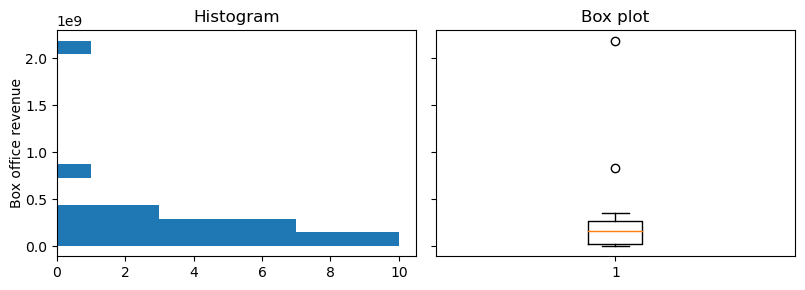

In [262]:
#plot distribution
fig, ax = plt.subplots(1,2, figsize=(8,3), sharey = True)

sbplt = ax[0]
sbplt.hist(nc.Movie_box_office_revenue, bins=15, orientation='horizontal')
sbplt.set_title('Histogram')

sbplt = ax[1]
sbplt.boxplot(nc.Movie_box_office_revenue)
sbplt.set_title('Box plot')
    
fig.tight_layout()
fig.text(0,0.3, "Box office revenue", rotation = 90)
plt.show()

In [289]:
#remove outliers
nc.query('Movie_box_office_revenue < 0.5e9', inplace=True)
nc.reset_index(inplace=True, drop=True)
print('The new number of movies considered is ' + str(len(nc)))

The new number of movies considered is 20


In this case, the distribution is way more readable. Most of the movies are in the low box office part

In [290]:
#some stats
print('The median is ' + str(np.median(nc.Movie_box_office_revenue)/1e6) + ' M$')
print('The first quartile is ' + str(np.quantile(nc.Movie_box_office_revenue,0.25)/1e6) + ' M$')
print('The third quartile is ' + str(np.quantile(nc.Movie_box_office_revenue,0.75)/1e6) + ' M$')

The median is 131.3261425 M$
The first quartile is 16.485594 M$
The third quartile is 198.76474275 M$


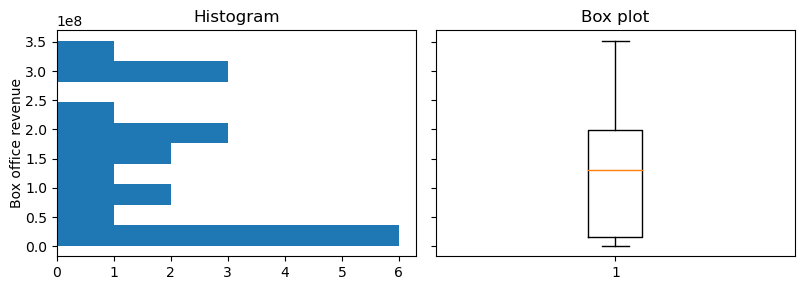

In [291]:
#plot again

fig, ax = plt.subplots(1,2, figsize=(8,3), sharey = True)

sbplt = ax[0]
sbplt.hist(nc.Movie_box_office_revenue, bins=10, orientation='horizontal')
sbplt.set_title('Histogram')

sbplt = ax[1]
sbplt.boxplot(nc.Movie_box_office_revenue)
sbplt.set_title('Box plot')
    
fig.tight_layout()
fig.text(0,0.3, "Box office revenue", rotation = 90)
plt.show()

### Actor's experience

In [292]:
#series with number of times the actor starred before (related to dataframe)
#in reality there are more movies
exp = np.zeros(len(nc)) 
t = 1
for i in range(len(nc)):
    exp[i] = t
    t += 1

In [293]:
nc['experience'] = exp #add to dataframe

In [294]:
#is there a correlation between experience and box office revenue??
stats.pearsonr(nc['experience'],nc['Movie_box_office_revenue']) #pearson correlation

PearsonRResult(statistic=0.5934248237363671, pvalue=0.00581203585134971)

In [295]:
stats.spearmanr(nc['experience'],nc['Movie_box_office_revenue'])

SpearmanrResult(correlation=0.6265513793971837, pvalue=0.0031167519062784994)

Applying the Pearson and Spearman relation, we obtain a positive correlation of **0.59** and **0.63**, respectively. This seems to lead to a link between experience and box office revenue.

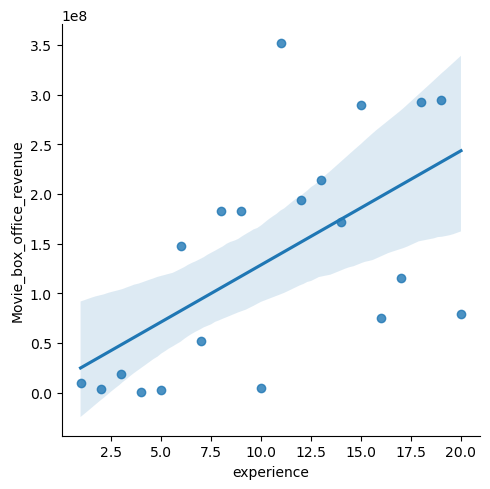

In [296]:
#plot linear correlation
sns.lmplot(x='experience',y='Movie_box_office_revenue', data=nc)
plt.show()

### Regression analysis

To understand a bit better the influence of the other parameters on the box office revenue, a model of the revenue based on multiple factors can be tested. The factors taken into consideration are:
- Movie release date;
- Movie runtime;
- Experience.

In [297]:
#copy dataframe
nc_reg = nc.copy()

In [298]:
#logarithmic scaling of continuous variables
nc_reg['Movie_box_office_revenue'] = np.log(nc_reg['Movie_box_office_revenue'])
nc_reg['Movie_runtime'] = np.log(nc_reg['Movie_runtime'])
nc_reg['Movie_release_date'] = np.log(nc_reg['Movie_release_date'])
nc_reg['experience'] = np.log(nc_reg['experience'])

In [299]:
#standardize continuous variables
#nc['Movie_runtime'] = (nc['Movie_runtime'] - nc['Movie_runtime'].mean())/nc['Movie_runtime'].std()
#nc['Movie_release_date'] = (nc['Movie_release_date'] - nc['Movie_release_date'].mean())/nc['Movie_release_date'].std()
#nc['Actor_age_at_movie_release'] = (nc['Actor_age_at_movie_release'] - nc['Actor_age_at_movie_release'].mean())/nc['Actor_age_at_movie_release'].std()
#nc['experience'] = (nc['experience'] - nc['experience'].mean())/nc['experience'].std()

In [300]:
mod = smf.ols(formula='Movie_box_office_revenue ~ Movie_runtime + Movie_release_date + \
                      + experience', data=nc_reg)

res = mod.fit()
print(res.summary())

                               OLS Regression Results                               
Dep. Variable:     Movie_box_office_revenue   R-squared:                       0.529
Model:                                  OLS   Adj. R-squared:                  0.441
Method:                       Least Squares   F-statistic:                     5.996
Date:                      Wed, 09 Nov 2022   Prob (F-statistic):            0.00613
Time:                              11:54:02   Log-Likelihood:                -33.826
No. Observations:                        20   AIC:                             75.65
Df Residuals:                            16   BIC:                             79.64
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

From the results, it is possible to get interesting information. The R squared is **0.53**, meaning more than half of the variance is explained; the movie release date significantly influences the revenue (C=**155.4**) and both the movie runtime and experience of the actor positively affect the revenue, even if their effect on the outcome is lower.
Of course, the inflation is not taken into account here, therefore the strong statistical influence of release dates on box office revenues could be biased by this confounder.

In [301]:
#take inflation into account
#https://liberalarts.oregonstate.edu/spp/polisci/faculty-staff/robert-sahr/inflation-conversion-factors-years-1774-estimated-2024-dollars-recent-years/individual-year-conversion-factor-table-0
cf = pd.read_csv('inflation_correction.csv')
cf.query('Year > 1969', inplace=True)
cf.reset_index(drop=True, inplace=True)
#cf['Year'] = pd.to_datetime(pd.Series(cf.Year)).dt.year #convert to datetime format

In [302]:
cf.head(3)

Year    CF
0  1970.0  0.16
1  1971.0  0.17
2  1972.0  0.17

In [311]:
#function to compute inflation for a certain year
def infl(year):
    inf = cf['CF'][cf['Year'] == year]
    return inf

In [312]:
#compute inflation for dataframe rows and add column
infl_corr = np.zeros(len(nc))
for i in range(len(nc)):
    infl_corr[i] = infl(nc['Movie_release_date'][i])
nc['CF'] = infl_corr

In [313]:
#add inflation corrected box office revenue
nc['inflation_revenue'] = nc['Movie_box_office_revenue']/nc['CF']

In [314]:
nc.head(3)

Wikipedia_movie_ID Freebase_movie_ID                   Movie_name  \
0              656608         /m/0306c6  What's Eating Gilbert Grape   
1             6417754         /m/0g4lfl              This Boy's Life   
2              740824         /m/037c_d       The Quick and the Dead   

   Movie_release_date  Movie_box_office_revenue  Movie_runtime  \
0              1993.0                10032765.0          117.0   
1              1993.0                 4104962.0          114.0   
2              1995.0                18636537.0          105.0   

                      Movie_languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/02h40lc": "English Language"}   

                                     Movie_countries  \
0          {"/m/09c7w0": "United States of America"}   
1          {"/m/09c7w0": "United States of America"}   
2  {"/m/09c7w0": "United States of America", "/m/...   

                                        Movie_genres       Character_name  \
0  {"/m/0219x_": "Indie", "/m/0clz1b": "Slice of ...          Arnie Grape   
1  {"/m/02h8pkk": "Family Drama", "/m/04xvlr": "P...  Tobias "Toby" Wolff   
2  {"/m/01jfsb": "Thriller", "/m/0gw5n2f": "Japan...  Fee "The Kid" Herod   

   ... Actor_height Actor_ethnicity         Actor_name  \
0  ...         1.83       /m/09kr66  Leonardo DiCaprio   
1  ...         1.83       /m/09kr66  Leonardo DiCaprio   
2  ...         1.83       /m/09kr66  Leonardo DiCaprio   

  Actor_age_at_movie_release Freebase_character/actor_map_ID  \
0                        NaN                       /m/0k7_65   
1                       18.0                       /m/0k71hy   
2                       20.0                      /m/02vby_g   

   Freebase_character_ID Freebase_actor_ID experience    CF  inflation_revenue  
0             /m/02nwr_8          /m/0dvmd        1.0  0.60       1.672128e+07  
1             /m/04gdr_7          /m/0dvmd        2.0  0.60       6.841603e+06  
2             /m/04gdr_y          /m/0dvmd        3.0  0.64       2.911959e+07  

[3 rows x 22 columns]

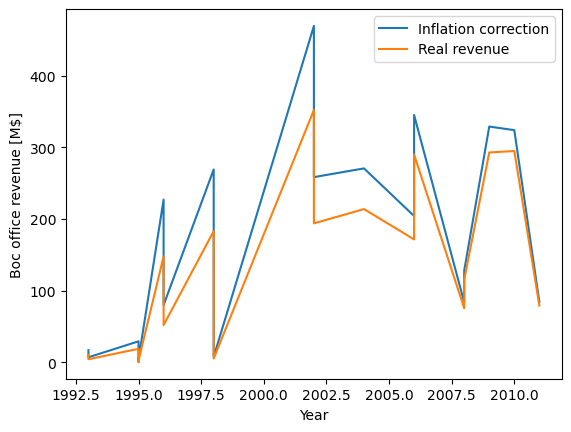

In [327]:
#compare the new revenues
plt.plot(nc.Movie_release_date, nc.inflation_revenue/1e6, label='Inflation correction')
plt.plot(nc.Movie_release_date, nc.Movie_box_office_revenue/1e6, label='Real revenue')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Boc office revenue [M$]')
plt.show()

In [332]:
#run the least mean squares again
nc_reg2 = nc.copy()
#logarithmic scaling of continuous variables
nc_reg2['inflation_revenue'] = np.log(nc_reg2['inflation_revenue'])
nc_reg2['Movie_runtime'] = np.log(nc_reg2['Movie_runtime'])
nc_reg2['Movie_release_date'] = np.log(nc_reg2['Movie_release_date'])
nc_reg2['experience'] = np.log(nc_reg2['experience'])

In [333]:
mod = smf.ols(formula='inflation_revenue ~ Movie_runtime + Movie_release_date + \
                      + experience', data=nc_reg2)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      inflation_revenue   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     4.913
Date:                Wed, 09 Nov 2022   Prob (F-statistic):             0.0132
Time:                        12:05:30   Log-Likelihood:                -33.877
No. Observations:                  20   AIC:                             75.75
Df Residuals:                      16   BIC:                             79.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -797.6714   1749

From the results above, a significant decrease of **1/3** in the influence of the movie release date is observed.

In [ ]:
dt = pd.DataFrame(ds.groupby('Movie_name')['Actor_name'].count())

In [ ]:
dt.head(50)